In [2]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
thesis_dir = '/home/azstephe/liverRegression/regression_liver/data/figs/'

colors = {
        'Rat': '#94c4be',      
        'Macaque': '#89a1b6',
        'Cow': '#d1c177',      
        'Pig': '#d59698',
        'Mouse': '#a78dc7',
        'Neg': '#a3a3a3'
}

super_super_lights = {
    'Rat': '#d9ecea',
    'Macaque': '#d5dde7',
    'Cow': '#f2ecd0',
    'Pig': '#f5d6d7',
    'Mouse': '#e2d8f0',
    'Neg': '#e0e0e0'
}

super_lights = {
    'Rat': '#cce4e0',
    'Macaque': '#c6d2de',
    'Cow': '#e8e0bb',
    'Pig': '#ebc5c7',
    'Mouse': '#d7cdea',
    'Neg': '#d1d1d1'

}

darks = {
        'Rat': '#7ea7a2',      
        'Macaque': '#74899b',
        'Cow': '#bfb164',      
        'Pig': '#b67076',
        'Mouse': '#8669a7',
        'Neg': '#8e8e8e'
}

lights = {
        'Rat': '#aadfda',      
        'Macaque': '#9eb9d1',
        'Cow': '#e3d289',      
        'Pig': '#f4b9bb',
        'Mouse': '#c6b3df',
        'Neg': '#b6b6b6'
}

super_darks = {
    'Rat': '#2e4946',       # dark teal
    'Macaque': '#2a3a46',   # dark slate blue
    'Cow': '#4d471f',       # dark olive
    'Pig': '#472d2f',       # dark rose
    'Mouse': '#5f4a77',      # dark gray
    'Neg': '#353535'      # dark gray
}

def histogram(pred_df, name, status):
    species = status.split(' ')[-1]
    plt.hist(pred_df, bins=50, color=colors[species])
    plt.xlim(0,4.1)
    plt.ylim(0, 1)
    plt.xlabel(f'{name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {status}')
    # plt.savefig(f"{thesis_dir}{direc}{status.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-test: {pearson_p_test:.4g}")
    
    spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-test: {spearman_p_test:.4g}")
    return pearson_corr, pearson_p_test, spearman_corr, spearman_p_test

def scatter(pred_df, true_df, title, xlabel, ylabel, r, rho):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}'
    plt.text(0.07, 0.93, textstr, transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='top')

    plt.grid(True)
    plt.show()
def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")
    return pearson_corr, pearson_p_value, spearman_corr, spearman_p_value

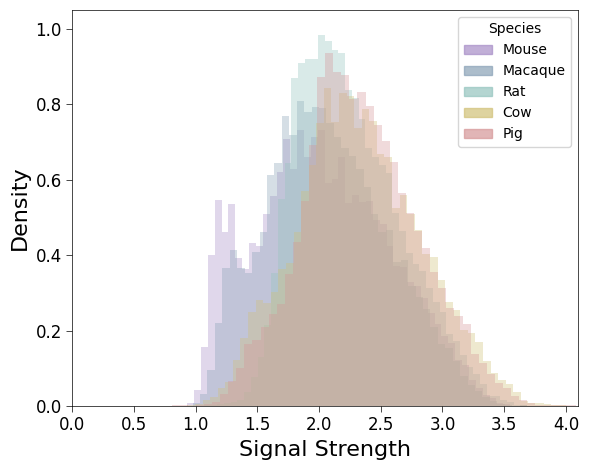

In [16]:
# histogram of logged overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'

files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/log/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/log/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/log/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/log/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.35, label=species, color=colors[species], density=True, edgecolor=None)

plt.xlabel('Signal Strength', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
        # 'Rat': '#94c4be',      
        # 'Macaque': '#89a1b6',
        # 'Cow': '#d1c177',      
        # 'Pig': '#d59698',
        # 'Mouse': '#a78dc7',
legend_handles = [
    Patch(facecolor='#a78dc7', edgecolor='#a78dc7', label='Mouse', alpha=0.7),
    Patch(facecolor='#89a1b6', edgecolor='#89a1b6', label='Macaque', alpha=0.7),
    Patch(facecolor='#94c4be', edgecolor='#94c4be', label='Rat', alpha=0.7),
    Patch(facecolor='#d1c177', edgecolor='#d1c177', label='Cow', alpha=0.7),
    Patch(facecolor='#d59698', edgecolor='#d59698', label='Pig', alpha=0.7)
]
plt.legend(title="Species", handles=legend_handles)
plt.xlim(0,4.1)
plt.ylim(0, 1.05)
ax=plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
ax.tick_params(width=0.5, length=4)
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}log5_overlay_density.svg", dpi=300, bbox_inches='tight')
plt.show()


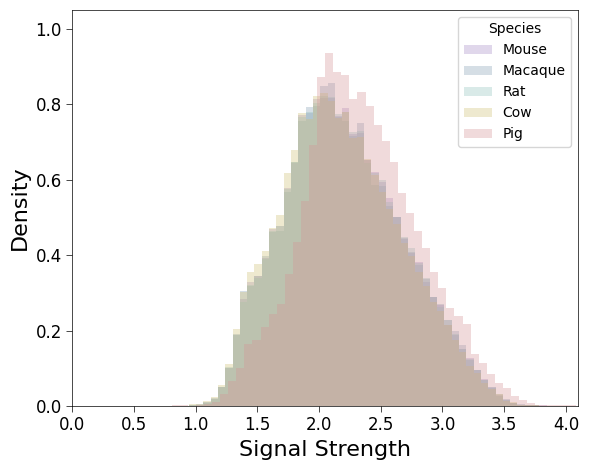

In [13]:
# histogram of ladder overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'
# Define file paths and labels
files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.35, label=species, color=colors[species], density=True, edgecolor=None)

plt.xlabel('Signal Strength', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Species")
plt.xlim(0,4.1)
plt.ylim(0, 1.05)
ax=plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
ax.tick_params(width=0.5, length=4)
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}ladder5_overlay_density.svg", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# nonmouse negative histograms
from scipy.stats import mannwhitneyu

direc = 'neg_hist_6_13/'

def histogram(pred_df, original_df, name, title, p_val, species, neg_pred_value, mean_pos_value, pos_label='Real for Pos'):
    plt.figure(figsize=(6, 4.8))
    plt.hist(pred_df, bins=50, label='Pred for Neg', alpha=0.5, color=colors['Neg'], density=True)
    plt.hist(original_df, bins=50, label=pos_label, alpha=0.5, color=colors[species.capitalize()], density=True)
    plt.xlim(0,4.1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    for spine in plt.gca().spines.values():
        spine.set_linewidth(0.5)
    ax.tick_params(width=0.5, length=4)
    plt.xlabel(f'{name}', fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(x=neg_pred_value, color=super_darks['Neg'], linestyle='-', linewidth=0.3)
    plt.axvline(x=mean_pos_value, color=super_darks[species.capitalize()], linestyle='-', linewidth=0.3)
    plt.legend()
    plt.savefig(f"{thesis_dir}{direc}{species}_{title.replace(' ', '_')}.svg", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()

def mannwhit(pred_df, original_df, name):
    x = pred_df.squeeze()
    y = original_df.squeeze()
        
    stat, p_value = mannwhitneyu(x, y, alternative='two-sided')
        
    print(f"Mann–Whitney U Test for {name}:")
    print(f"P-Value: {p_value:.4g}")
        
        # Interpretation
    alpha = 0.05

    return p_value

results = []
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['macaque']
model_list = ['bdbi7l3n']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')

        original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]
        
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)

        print(f'average test1 prediction: {pred_test1_df.mean()[0]}')
        
        p_val_test1 = mannwhit(pred_test1_df, original_df, 'test1') 


        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred test1 vs real pos test',
            'avg_pred_neg_test1': pred_test1_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_test1
        })
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_neg_df = pred_orthologs_df.tail(neg_len)
        pred_pos_df = pred_orthologs_df.head(pos_len)

        print(f'average neg test prediction: {pred_neg_df.mean()[0]}')
        print(f'average pos pred prediction: {pred_pos_df.mean()[0]}')
        print(f'average pos real: {original_df.mean()}')

        p_val_neg = mannwhit(pred_neg_df, original_df, 'full neg test set')
        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs real pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_neg
        })
        
        p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')
        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs pred pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': pred_pos_df.mean()[0],
            'p_value': p_val_neg_pred
        })
        

        # load all the DFs
        # pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
        
        # val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        # val1_len = 2*len(val1_df)
        
        # doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        # pred_val1_df = pred_df.head(val1_len)
        
        # print(f'average val1 prediction: {pred_val1_df.mean()[0]}')
        
        histogram(pred_test1_df, original_df, 'Signal Strength', 'Negative Test1 Vs. True Signal Strength', p_val_test1, species, pred_test1_df.mean()[0], original_df.mean())
        histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0], original_df.mean())
        histogram(pred_neg_df, pred_pos_df, 'Signal Strength', 'Negative Test Set Vs. Positive Test Set Predictions', p_val_neg_pred, species, pred_neg_df.mean()[0], pred_pos_df.mean()[0], 'Pred for Pos')

species = 'mouse'
print('mouse\n')
original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]

pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
neg_len = 2*len(neg_df)
pos_len = 2*len(pos_df)
        
doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
pred_neg_df = pred_df.tail(neg_len)
pred_pos_df = pred_df.head(pos_len)

print(f'average neg test prediction: {pred_neg_df.mean()[0]}')
print(f'average pos prediction: {pred_pos_df.mean()[0]}')
print(f'average pos real: {original_df.mean()}')

p_val_neg = mannwhit(pred_neg_df, original_df, 'neg test set')
p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')  

p_val_neg = mannwhit(pred_neg_df, original_df, 'full neg test set')
results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs real pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_neg
        })
        
p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')
results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs pred pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': pred_pos_df.mean()[0],
            'p_value': p_val_neg_pred
        })

        
histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0], original_df.mean())
histogram(pred_neg_df, pred_pos_df, 'Signal Strength', 'Negative Test Set Vs. Positive Test Set Predictions', p_val_neg_pred, species, pred_neg_df.mean()[0], pred_pos_df.mean()[0], 'Pred for Pos')


results_df = pd.DataFrame(results)
results_df.to_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables/negative_set_histogram_stats.csv', index=False)


macaque

bdbi7l3n
average test1 prediction: 0.5831912033168104
Mann–Whitney U Test for test1:
P-Value: 0
average neg test prediction: 0.6036721665808168
average pos pred prediction: 0.9005607590725991
average pos real: 2.064654389379398
Mann–Whitney U Test for full neg test set:
P-Value: 0
Mann–Whitney U Test for neg test set vs pos test set:
P-Value: 0

rat

bdbi7l3n
average test1 prediction: 0.6720142274478504
Mann–Whitney U Test for test1:
P-Value: 0
average neg test prediction: 0.6595297161224745
average pos pred prediction: 0.9390729578796584
average pos real: 2.2472077650036546
Mann–Whitney U Test for full neg test set:
P-Value: 0
Mann–Whitney U Test for neg test set vs pos test set:
P-Value: 0

cow

bdbi7l3n
average test1 prediction: 0.5920153741275761
Mann–Whitney U Test for test1:
P-Value: 0
average neg test prediction: 0.6190834491369623
average pos pred prediction: 0.9797570492481971
average pos real: 2.3246000851397275
Mann–Whitney U Test for full neg test set:
P-Value: 0


In [40]:
# test log scatter
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap, to_rgb

direc='test_scatter_6_13/'
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)
def format_pval(p):
    return "0.0" if p == 0 else f"{p:.2e}"

def make_smooth_colormap(name, colors_hex, n_points=256):
    colors_rgb = [to_rgb(c) for c in colors_hex]
    return LinearSegmentedColormap.from_list(name, colors_rgb, N=n_points)
    
def make_triple_colormap(base_hex, name):
    # base_rgb = np.array(to_rgb(base_hex))
    # if name == 'Cow_triple':
    #     # yellow → orange (base) → red-brown
    #     return LinearSegmentedColormap.from_list(
    #         'Cow_contrast', ['#fffbb4', base_hex, '#8b3f1f']
    #     )

    # elif name == 'Mouse_triple':
    #     print('mouse')
    #     # pink → purple (base) → blue
    #     return LinearSegmentedColormap.from_list(
    #         'Mouse_contrast', ['#c9a3f0', '#8d3cde', '#3a0b61']
    #     )

    # else:
    #     # default: pale yellow → base → dark blue
    #     return LinearSegmentedColormap.from_list(
    #         name + '_contrast', ['#ffffcc', base_hex, '#3b528b']
    #     )
    # return LinearSegmentedColormap.from_list(name, [light_rgb, base_rgb, dark_rgb])
    if name == 'Cow_triple':
        return make_smooth_colormap('Cow_contrast', [lights['Cow'], '#e07014', '#db3218', '#db0f6b'])
    elif name == 'Mouse_triple':
        return make_smooth_colormap('Mouse_contrast', [lights['Mouse'], '#320dd6', '#0f3dd4', '#1290a6'])
    else:
        return make_smooth_colormap(name + '_contrast', ['#ffffcc', base_hex, '#3b528b'])

triple_cmaps = {name: make_triple_colormap(hex_color, name + '_triple')
                for name, hex_color in colors.items()}
def scatter(pred_df, true_df, title, xlabel, ylabel, r, rP, rho, rhoP, mse, species):
    x = true_df.squeeze()
    y = pred_df.squeeze()

    gridsize=50
    
    plt.figure(figsize=(6, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='black', linestyle='--', linewidth=1, dashes=(10, 10))


    
    custom_cmap = triple_cmaps[species.capitalize()]
    # custom_cmap = LinearSegmentedColormap.from_list("light_to_super_dark", [super_lights[species.capitalize()], super_darks[species.capitalize()]])
        
    hb = plt.hexbin(x, y, gridsize=gridsize, cmap=custom_cmap, mincnt=1)  # higher gridsize = finer bins
    cb = plt.colorbar(hb)

    # Set colorbar ticks to integers only
    cb.locator = ticker.MaxNLocator(integer=True)
    cb.update_ticks()

    plt.xlabel(f'{xlabel}', fontsize=18)
    plt.ylabel(f'{ylabel}', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    textstr = f'$r$ = {r:.2f}, p = {rP*48:.2g}\n$\\rho$ = {rho:.2f}, p = {rhoP*48:.2g}\nmse = {mse:.2f}'
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=14, verticalalignment='top')

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.tick_params(width=0.5, length=4)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    x = true_df.squeeze().values.reshape(-1, 1)
    y = pred_df.squeeze().values

    # Fit linear regression
    reg = LinearRegression().fit(x, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    reg_line = reg.predict(x)
    plt.plot(x, reg_line, color=super_darks[species.capitalize()], linewidth=1.2, label=f'Linear Fit (slope = {slope:.2f})')
    print(f'slope: {slope:.2f}')
    plt.tight_layout()

    plt.savefig(f"{thesis_dir}{direc}{title.replace(' ', '_')}_density_{str(gridsize)}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()

# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['cow']

model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
# model_list = ['bdbi7l3n']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        print(f'average neg test prediction: {pred_neg_df.mean()}')
        
        
        test2R, test2RP, test2Rho, test2RhoP = correlations(pred_test2_df, doubled_test2_df, 'test2')
        test3R, test3RP, test3Rho, test3RhoP = correlations(pred_test3_df, doubled_test3_df, 'test3')
        orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
        test2Mse = mean_squared_error(doubled_test2_df, pred_test2_df)
        test3Mse = mean_squared_error(doubled_test3_df, pred_test3_df)
        orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)
        
        scatter(pred_test2_df, doubled_test2_df, f'{species.capitalize()} Prediction Accuracy for Test2 ({model})', 'Real', 'Predicted', test2R, test2RP, test2Rho, test2RhoP, test2Mse, species)
        scatter(pred_test3_df, doubled_test3_df, f'{species.capitalize()} Prediction Accuracy for Test3 ({model})', 'Real', 'Predicted', test3R, test3RP, test3Rho, test3RhoP, test3Mse, species)
        scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho, orthoRhoP, orthoMse, species)
species = 'mouse'
for model in model_list:
    pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)

    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
    pos_len = 2*len(pos_df)
        
        # input sanity check
    if len(pred_orthologs_df) != neg_len+pos_len:
        print("ERROR: precdictions are a different length than testidation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_orthologs_df.head(pos_len)
    pred_neg_df = pred_orthologs_df.tail(neg_len)

    print(f'average neg test prediction: {pred_neg_df.mean()}')
    
    orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
    orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)
    scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho,orthoRhoP, orthoMse, species)


cow

bdbi7l3n
average test1 prediction: 0    0.592015
dtype: float64
average neg test prediction: 0    0.619083
dtype: float64
Pearson correlation coefficient for test2: 0.3636, p-test: 1.685e-22
Spearman correlation coefficient for test2: 0.3636, p-test: 1.714e-22
Pearson correlation coefficient for test3: 0.3185, p-test: 4.223e-34
Spearman correlation coefficient for test3: 0.3212, p-test: 1.107e-34
Pearson correlation coefficient for mouse test orthologs: 0.3769, p-test: 7.746e-113
Spearman correlation coefficient for mouse test orthologs: 0.3852, p-test: 3.337e-118
slope: 0.21
slope: 0.18
slope: 0.22

kf8188qf
average test1 prediction: 0    0.390403
dtype: float64
average neg test prediction: 0    0.482266
dtype: float64
Pearson correlation coefficient for test2: 0.4160, p-test: 1.385e-29
Spearman correlation coefficient for test2: 0.4401, p-test: 2.667e-33
Pearson correlation coefficient for test3: 0.3817, p-test: 2.273e-49
Spearman correlation coefficient for test3: 0.3790, p-te

In [33]:
# test log scatter
from sklearn.linear_model import LinearRegression
direc='test_scatter/'
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)
    
def scatter(pred_df, true_df, title, xlabel, ylabel, r, rho, mse, species):
    x = true_df.squeeze().values.reshape(-1, 1)
    y = pred_df.squeeze().values

    # Fit linear regression
    reg = LinearRegression().fit(x, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    reg_line = reg.predict(x)
    

    plt.figure(figsize=(6, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='black', linestyle='--', label='y = x')
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(x, y, alpha=0.2, color=colors[species.capitalize()])
    plt.plot(x, reg_line, color=super_darks[species.capitalize()], linewidth=1.2, label=f'Linear Fit (slope = {slope:.2f})')

    plt.xlabel(xlabel, size='large')
    plt.ylabel(ylabel, size='large')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}\nmse = {mse:.2f}'
    print(f'{title} slope = {slope:.2f}')
    plt.text(0.07, 0.93, textstr, transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top')
    plt.grid(True)
    # plt.show()
    # plt.savefig(f"{thesis_dir}{direc}{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.close()

# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['macaque']

# model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
model_list = ['bdbi7l3n']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        print(f'average neg test prediction: {pred_neg_df.mean()}')
        
        
        test2R, test2RP, test2Rho, test2RhoP = correlations(pred_test2_df, doubled_test2_df, 'test2')
        test3R, test3RP, test3Rho, test3RhoP = correlations(pred_test3_df, doubled_test3_df, 'test3')
        orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
        test2Mse = mean_squared_error(doubled_test2_df, pred_test2_df)
        test3Mse = mean_squared_error(doubled_test3_df, pred_test3_df)
        orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)
        
        scatter(pred_test2_df, doubled_test2_df, f'{species.capitalize()} Prediction Accuracy for Test2 ({model})', 'Real', 'Predicted', test2R, test2Rho, test2Mse, species)
        scatter(pred_test3_df, doubled_test3_df, f'{species.capitalize()} Prediction Accuracy for Test3 ({model})', 'Real', 'Predicted', test3R, test3Rho, test3Mse, species)
        scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRho, orthoMse, species)

species = 'mouse'
for model in model_list:
    pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)

    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
    pos_len = 2*len(pos_df)
        
        # input sanity check
    if len(pred_orthologs_df) != neg_len+pos_len:
        print("ERROR: predictions are a different length than testidation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_orthologs_df.head(pos_len)
    pred_neg_df = pred_orthologs_df.tail(neg_len)

    print(f'average neg test prediction: {pred_neg_df.mean()}')
    
    orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
    orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)
    scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRho, orthoMse, species)


macaque

bdbi7l3n
average test1 prediction: 0    0.583191
dtype: float64
average neg test prediction: 0    0.603672
dtype: float64
Pearson correlation coefficient for test2: 0.2895, p-test: 1.116e-19
Spearman correlation coefficient for test2: 0.2736, p-test: 1.124e-17
Pearson correlation coefficient for test3: 0.3354, p-test: 9.046e-64
Spearman correlation coefficient for test3: 0.3595, p-test: 1.191e-73
Pearson correlation coefficient for mouse test orthologs: 0.3266, p-test: 1.034e-130
Spearman correlation coefficient for mouse test orthologs: 0.3461, p-test: 1.444e-147
Macaque Prediction Accuracy for Test2 (bdbi7l3n) slope = 0.18
Macaque Prediction Accuracy for Test3 (bdbi7l3n) slope = 0.18
Macaque Prediction Accuracy for orthologs (bdbi7l3n) slope = 0.19
average neg test prediction: 0    0.609156
dtype: float64
Pearson correlation coefficient for mouse test orthologs: 0.4958, p-test: 0
Spearman correlation coefficient for mouse test orthologs: 0.5022, p-test: 0
Mouse Prediction A

/tmp/ipykernel_18093/1199936761.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_summary['metric'] = best_summary['metric'].replace(label_map)


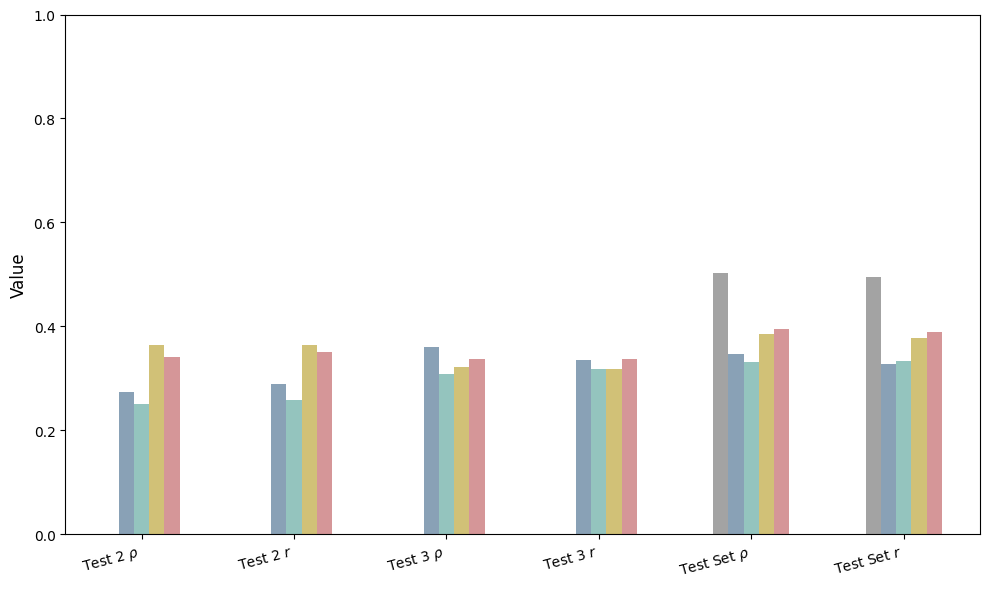

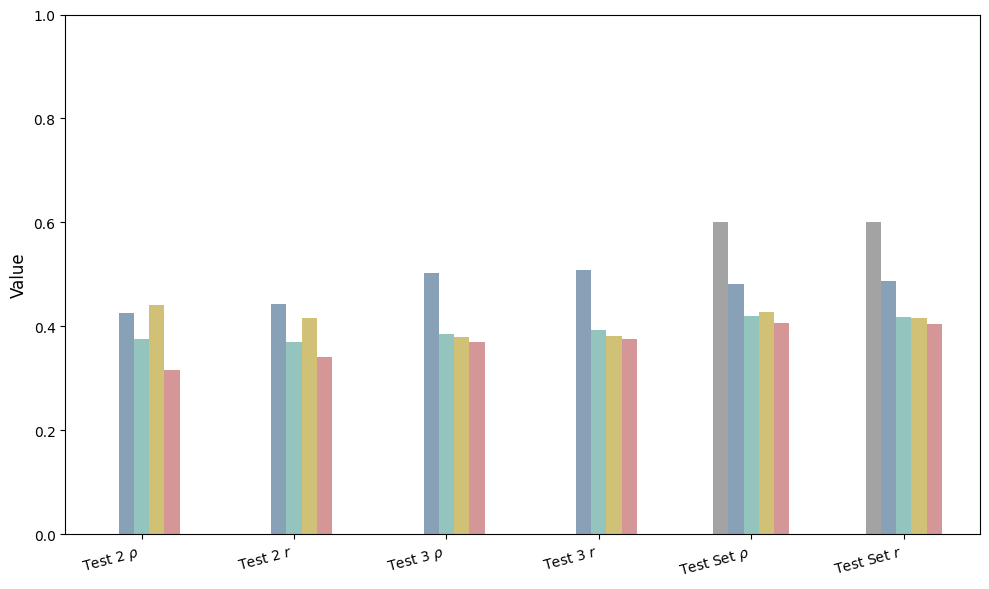

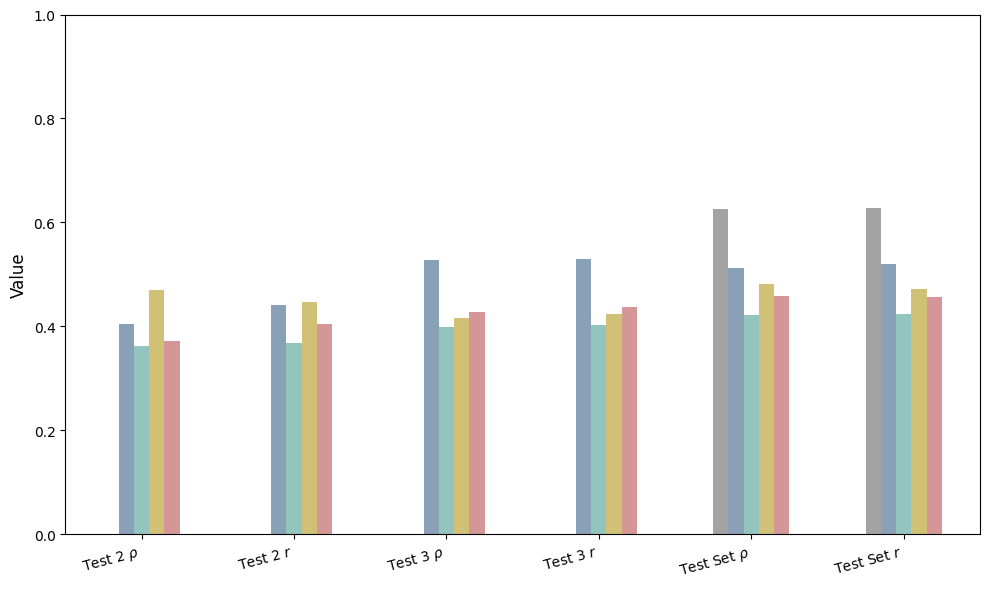

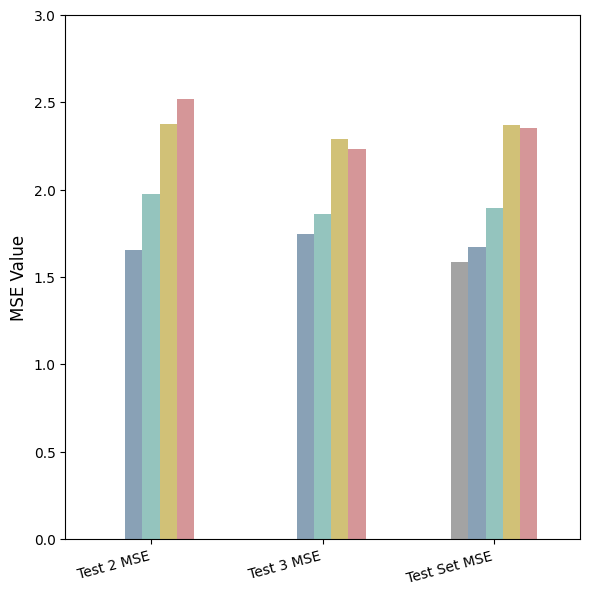

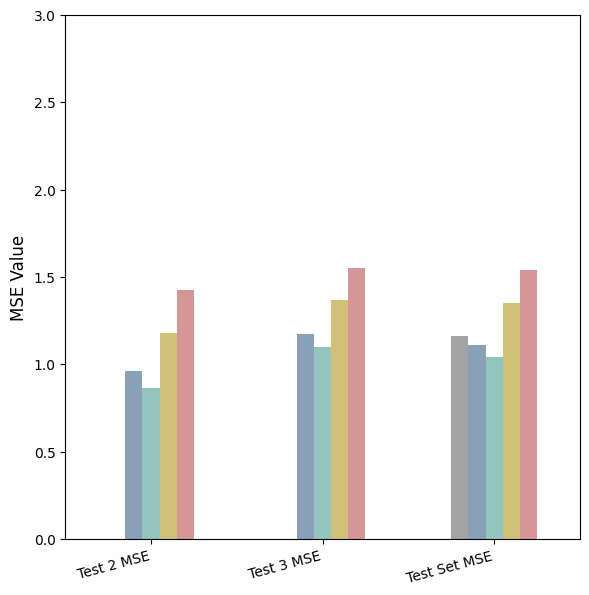

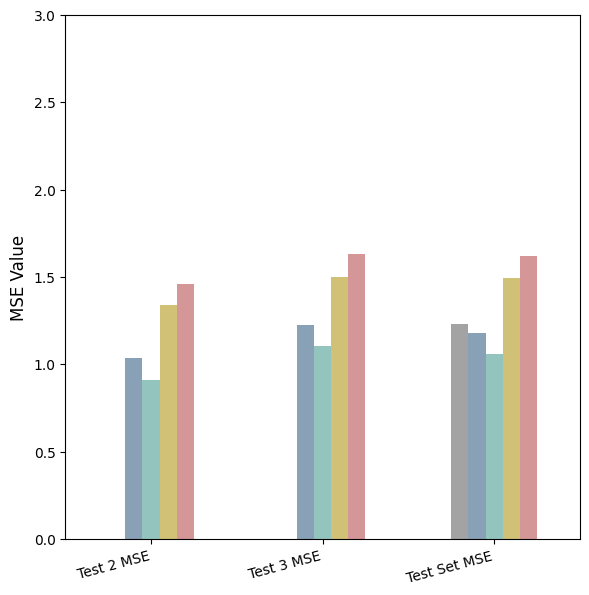

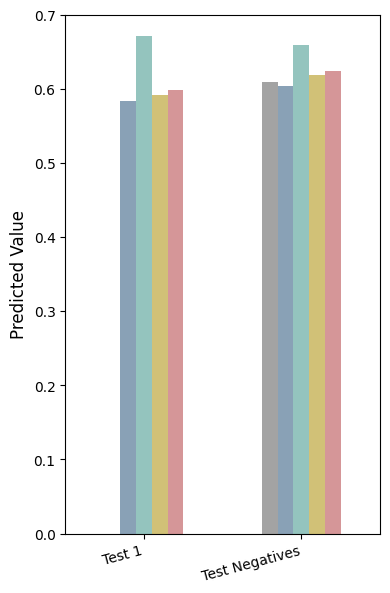

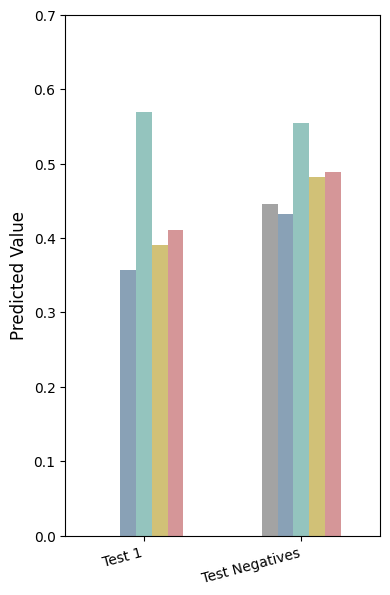

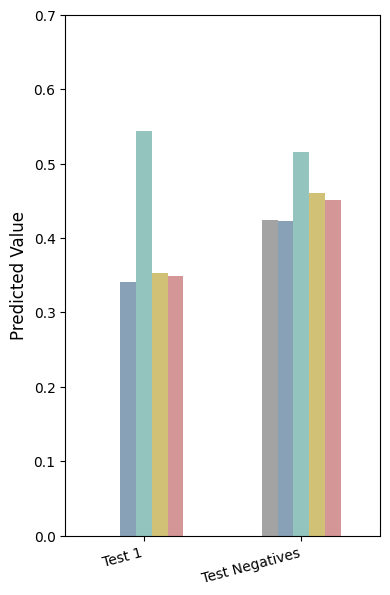

In [55]:
# pearson and spearman bar chart
import pandas as pd
import matplotlib.pyplot as plt
direc = '3BestModels_bar/'
species_order = ['mouse', 'macaque', 'rat', 'cow', 'pig']

models = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']

summary_pivot = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables/log_correlation_summary.csv')

def highlight_max(row):
    numeric_values = row.iloc[2:]  # adjust index based on your actual layout
    max_val = numeric_values.max()
    return ['' if i < 2 else 'background-color: yellow' if val == max_val else '' 
            for i, val in enumerate(row)]

df = summary_pivot.iloc[:,list(range(0, 2)) + list(range(10, 15))]
styled_df = df.style.apply(highlight_max, axis=1)
best_summary = summary_pivot.iloc[:,list(range(0, 2)) + [2, 7, 10]]

label_map = {
    'avg_neg_pred': 'Test Negatives',
    'avg_test1_pred': 'Test 1',
    'orthologs_MSE': 'Test Set MSE',
    'orthologs_pearson': f'Test Set $r$',
    'orthologs_spearman': f'Test Set $\\rho$',
    'test2_MSE': 'Test 2 MSE',
    'test2_pearson': f'Test 2 $r$',
    'test2_spearman': f'Test 2 $\\rho$',
    'test3_MSE': 'Test 3 MSE',
    'test3_pearson': f'Test 3 $r$',
    'test3_spearman': f'Test 3 $\\rho$',
}

best_summary['metric'] = best_summary['metric'].replace(label_map)

non_mse_df = best_summary[~best_summary['metric'].str.contains('MSE|Negatives|1', regex=True)]

# Create one bar plot per model
for model in models:
    # Pivot table: metrics as rows, species as columns
    data = non_mse_df.pivot(index='metric', columns='species', values=model)

    # Reorder columns (species)
    data = data[species_order]

    ax = data.plot(kind='bar', figsize=(10, 6), color=[colors[sp.capitalize()] for sp in species_order])
    ax.legend().set_visible(False)
    ax.set_ylabel('Value', size='large')
    ax.set_xlabel('')
    plt.xticks(rotation=15, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    # plt.savefig(f"{thesis_dir}{direc}{model}_r_rho.png", dpi=300, bbox_inches='tight')
    plt.show()
    # plt.close

mse_df = best_summary[best_summary['metric'].str.contains('MSE')]

mse_metrics = mse_df['metric'].unique()

# Plot MSE metrics separately for each model
for model in models:
    # Pivot table with metrics as rows and species as columns
    data = mse_df.pivot(index='metric', columns='species', values=model)
    
    # Reorder species columns
    data = data[species_order]

    ax = data.plot(kind='bar', figsize=(6, 6), color=[colors[sp.capitalize()] for sp in species_order])
    ax.legend().set_visible(False)
    ax.set_ylabel('MSE Value', size='large')
    ax.set_xlabel('')
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.ylim(0, 3.0)
    # plt.savefig(f"{thesis_dir}{direc}{model}_mse.png", dpi=300, bbox_inches='tight')
    plt.show()
    # plt.close()

pred_df = best_summary[best_summary['metric'].str.contains('Negatives|1', regex=True)]

pred_metrics = mse_df['metric'].unique()

for model in models:
    # Pivot table with metrics as rows and species as columns
    data = pred_df.pivot(index='metric', columns='species', values=model)
    
    # Reorder species columns
    data = data[species_order]

    ax = data.plot(kind='bar', figsize=(4, 6), color=[colors[sp.capitalize()] for sp in species_order])
    ax.legend().set_visible(False)
    ax.set_ylabel('Predicted Value', size='large')
    ax.set_xlabel('')
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.ylim(0, 0.7)
    # plt.savefig(f"{thesis_dir}{direc}{model}_pred.png", dpi=300, bbox_inches='tight')
    plt.show()
    # plt.close()

macaque
bdbi7l3n
# of same sign for true difference and predicted difference: 0.5839598997493735 %
Pearson correlation coefficient: 0.2124, p-value: 1.37e-09
Spearman correlation coefficient: 0.2022, p-value: 8.237e-09
0.09837794463340346


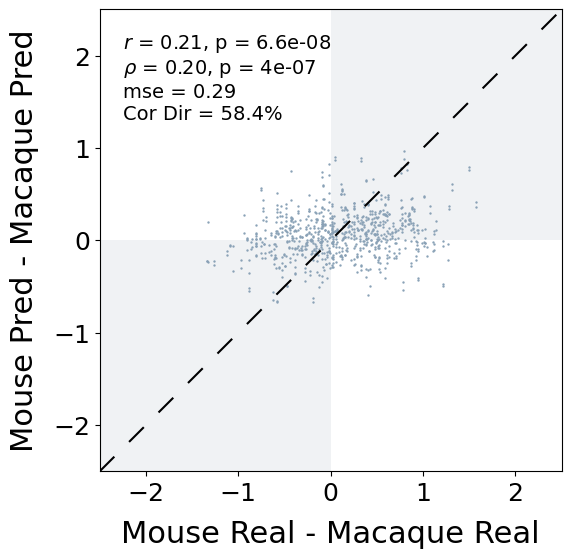

In [11]:
# FOLDCHANGE
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)
direc = 'foldchange/'

# species = 'macaque'
# model = 'bdbi7l3n'

# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['macaque']

# model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
model_list = ['bdbi7l3n']

mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)

real_neg_len = 2*len(mouse_real_neg)
real_pos_len = 2*len(mouse_real_pos)

for species in species_list:
    print(species)
    mac_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
    mouse_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
    one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')
    
    peaks = one_to_one_peaks[[4, 14]]

    merged_df = peaks.merge(mac_qn, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
    merged_df = merged_df.merge(mouse_qn, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
    
    for model in model_list:
        print(model)

        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        # val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)

        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
        
        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)




        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_TEST.csv', sep="\t", header=None)


        mouse_pred_pos = mouse_pred.head(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        
        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)
        
        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)

####################### make bigboss mouse + query predicted and real info

        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
        
        mouse_av = (bigboss.loc[::2, 'mouse_pred'].values + bigboss.loc[1::2, 'mouse_pred'].values) / 2
        mac_av = (bigboss.loc[::2, 'mac_pred'].values + bigboss.loc[1::2, 'mac_pred'].values) / 2
        
        # Add the averages back to the DataFrame as a new column
        bigboss.loc[::2, 'mouse_pred_avg'] = mouse_av  # Assign averages to even indices only
        bigboss.loc[::2, 'mac_pred_avg'] = mac_av 
        bigboss['avg_pred'] = bigboss['mouse_pred_avg']-bigboss['mac_pred_avg']
        
        
        same_sign = np.sign(bigboss['true']) == np.sign(bigboss['pred'])
        same_sign_percentage = same_sign.sum() / len(bigboss)
        print(f'# of same sign for true difference and predicted difference: {same_sign_percentage} %')
        
        # same_sign = np.sign(bigboss.loc[::2]['true']) == np.sign(bigboss.loc[::2]['avg_pred'])
        # print(f'# of same sign for true difference and averaged predicted difference: {same_sign.sum()} / {len(bigboss) / 2} = {same_sign.sum() / (len(bigboss) / 2)}%')
        
        x = bigboss['true']
        y = bigboss['pred']
        
        mse = mean_squared_error(x, y)
        
        r, rP, rho, rhoP = pearson_spearman(x, y)
        xlim = (-2.5, 2.5)
        ylim = (-2.5, 2.5)
        
        fig, ax = plt.subplots(figsize=(6,6))
        
        # Shade quadrant I (x > 0 and y > 0)
        ax.add_patch(Rectangle((0, 0), xlim[1], ylim[1],
                               facecolor=darks[species.capitalize()], alpha=0.1))
        
        # Shade quadrant III (x < 0 and y < 0)
        ax.add_patch(Rectangle((xlim[0], ylim[0]), abs(xlim[0]), abs(ylim[0]),
                               facecolor=darks[species.capitalize()], alpha=0.1))
        
        # Set limits and aspect ratio
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_aspect('equal')

        textstr = f'$r$ = {r:.2f}, p = {rP*48:.2g}\n$\\rho$ = {rho:.2f}, p = {rhoP*48:.2g}\nmse = {mse:.2f}\nCor Dir = {same_sign_percentage*100:.1f}%'
        plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=14, verticalalignment='top')

        
        plt.scatter(x, y, color=colors[species.capitalize()], marker='.', s=2)
        x = bigboss['true'].squeeze().values.reshape(-1, 1)
        y = bigboss['pred'].squeeze().values

        reg = LinearRegression().fit(x, y)
        slope = reg.coef_[0]
        intercept = reg.intercept_
        reg_line = reg.predict(x)
        # plt.plot(x, reg_line, color=super_darks[species.capitalize()], linewidth=1.2, label=f'Linear Fit (slope = {slope:.2f})')
        print(slope)
        plt.plot([-2.5, 2.5], [-2.5, 2.5], color='black', linestyle='--', label='y = x', dashes=(10, 10))
        plt.xlabel(f'Mouse Real - {species.capitalize()} Real', labelpad=10, fontsize=22)
        plt.ylabel(f'Mouse Pred - {species.capitalize()} Pred', labelpad=10, fontsize=22)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        # plt.title(f'Foldchange diff in real vs. predicted for model: {model}')
        # plt.savefig(f"{thesis_dir}{direc}{species}_{model}_6_10.png", dpi=300, bbox_inches='tight')
        plt.show()

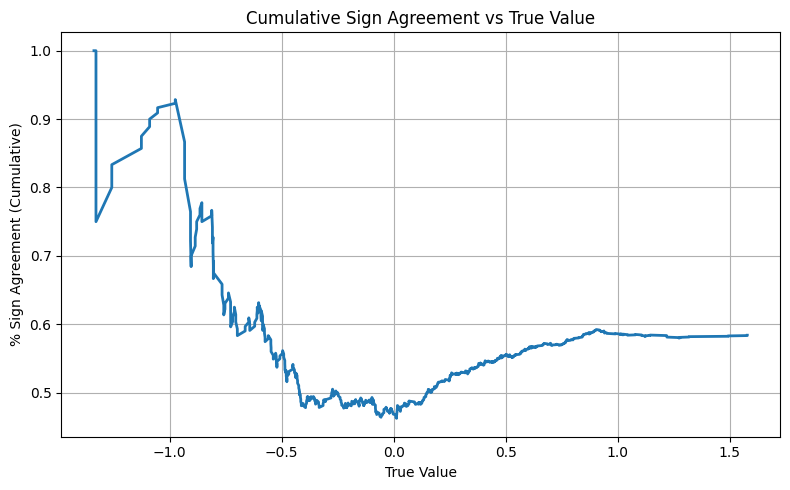

In [12]:
df = bigboss
df = df.dropna(subset=['true', 'pred'])

# Sort by true value
df_sorted = df.sort_values(by='true').reset_index(drop=True)

# Compute sign agreement: 1 if same sign, else 0
sign_match = np.sign(df_sorted['true']) == np.sign(df_sorted['pred'])
sign_match = sign_match.astype(int)
df_sorted['sign_match'] = sign_match

# Compute cumulative match percentage
cumulative_percent_match = sign_match.cumsum() / (np.arange(len(sign_match)) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_sorted['true'], cumulative_percent_match, lw=2)
plt.xlabel('True Value')
plt.ylabel('% Sign Agreement (Cumulative)')
plt.title('Cumulative Sign Agreement vs True Value')
plt.grid(True)
plt.tight_layout()
plt.show()

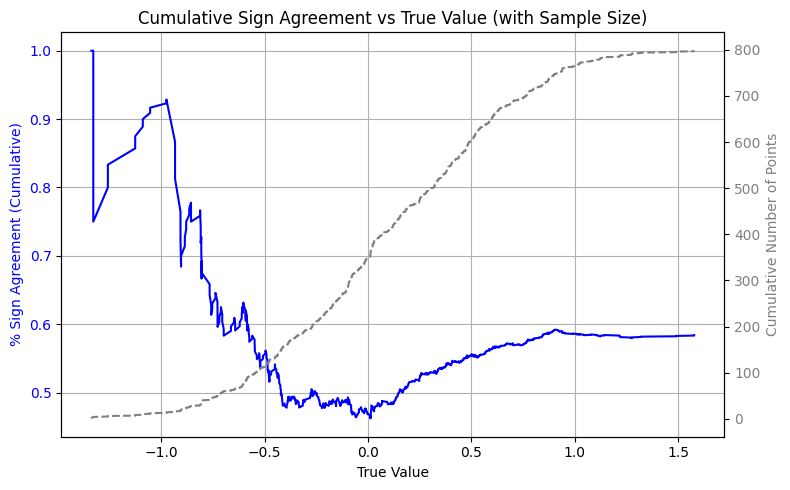

In [15]:
df = bigboss
df = df.dropna(subset=['true', 'pred'])
df_sorted = df.sort_values(by='true').reset_index(drop=True)

# Compute sign match as binary 0/1
sign_match = (np.sign(df_sorted['true']) == np.sign(df_sorted['pred'])).astype(int)

# Compute cumulative percent match
cumulative_percent_match = sign_match.cumsum() / (np.arange(len(sign_match)) + 1)

# Cumulative number of points (1, 2, 3, ..., N)
cumulative_counts = np.arange(1, len(df_sorted) + 1)

# Plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Left y-axis: % sign agreement
ax1.plot(df_sorted['true'], cumulative_percent_match, color='blue', label='% Sign Match')
ax1.set_xlabel('True Value')
ax1.set_ylabel('% Sign Agreement (Cumulative)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis: cumulative number of points
ax2 = ax1.twinx()
ax2.plot(df_sorted['true'], cumulative_counts, color='gray', linestyle='dashed', label='Cumulative Count')
ax2.set_ylabel('Cumulative Number of Points', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and grid
plt.title('Cumulative Sign Agreement vs True Value (with Sample Size)')
ax1.grid(True)
fig.tight_layout()
plt.show()

macaque
bdbi7l3n
kf8188qf
cq45eb2s


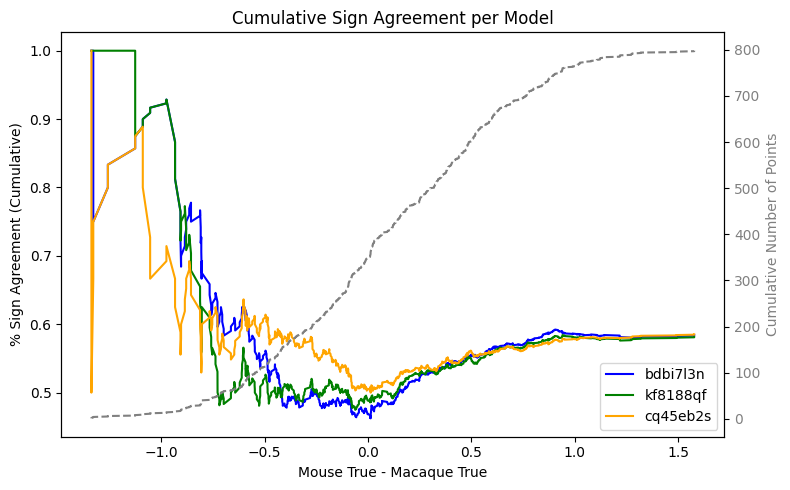

In [26]:
# FOLDCHANGE
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)
direc = 'foldchange/'

# species = 'macaque'
# model = 'bdbi7l3n'

# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['macaque']

model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
# model_list = ['bdbi7l3n']

mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)

real_neg_len = 2*len(mouse_real_neg)
real_pos_len = 2*len(mouse_real_pos)

for species in species_list:
    print(species)
    mac_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
    mouse_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
    one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')
    
    peaks = one_to_one_peaks[[4, 14]]

    merged_df = peaks.merge(mac_qn, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
    merged_df = merged_df.merge(mouse_qn, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
    
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()
    
    # Define model list and colors
    colors = ['blue', 'green', 'orange']
    
    for model, color in zip(model_list, colors):
        print(model)

        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        # val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)

        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
        
        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)




        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_TEST.csv', sep="\t", header=None)


        mouse_pred_pos = mouse_pred.head(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        
        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)
        
        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)

####################### make bigboss mouse + query predicted and real info

        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
        
        df = bigboss.dropna(subset=['true', 'pred']).sort_values(by='true').reset_index(drop=True)
        sign_match = (np.sign(df['true']) == np.sign(df['pred'])).astype(int)
        cumulative_percent_match = sign_match.cumsum() / (np.arange(len(sign_match)) + 1)
        cumulative_counts = np.arange(1, len(df) + 1)
    
        # === Plot ===
        ax1.plot(df['true'], cumulative_percent_match, label=f'{model}', color=color)
        
    # Plot cumulative count once
    ax2.plot(df['true'], cumulative_counts, color='gray', linestyle='dashed', label='Cumulative Count')
    ax2.set_ylabel('Cumulative Number of Points', color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')
    
    # Axes styling
    ax1.set_xlabel('Mouse True - Macaque True')
    ax1.set_ylabel('% Sign Agreement (Cumulative)')
    ax1.legend(loc='lower right')
    ax1.grid(False)
    plt.title('Cumulative Sign Agreement per Model')
    fig.tight_layout()
    plt.show()

In [46]:
# COR DIR GRAPH
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)
direc = 'foldchange/'

# species = 'macaque'
# model = 'bdbi7l3n'

# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['macaque']

# model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
model_list = ['bdbi7l3n']

mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)

real_neg_len = 2*len(mouse_real_neg)
real_pos_len = 2*len(mouse_real_pos)

for species in species_list:
    print(species)
    mac_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
    mouse_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
    one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')
    
    peaks = one_to_one_peaks[[4, 14]]

    merged_df = peaks.merge(mac_qn, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
    merged_df = merged_df.merge(mouse_qn, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
    
    for model, color in zip(model_list, colors):
        print(model)

        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        # val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)

        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
        
        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)
        
        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_TEST.csv', sep="\t", header=None)


        mouse_pred_pos = mouse_pred.head(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        
        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)
        
        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)

####################### make bigboss mouse + query predicted and real info

        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
mac_val2_real_pred

macaque
bdbi7l3n


,mac_chr,1,2,3,mac_true,mac_pred
0,chr1,134736163,134736663,peak35917,2.214026,1.016174
1,chr1,134736163,134736663,peak35917,2.214026,0.991162
2,chr1,136933860,136934360,peak49234,2.122200,1.009591
3,chr1,136933860,136934360,peak49234,2.122200,0.799373
4,chr1,136934092,136934592,peak48014,2.131472,0.955805
...,...,...,...,...,...,...
949,chr9,86944159,86944659,peak14033,2.823560,0.564966
950,chr9,98539330,98539830,peak98237,1.102986,0.779957
951,chr9,98539330,98539830,peak98237,1.102986,0.876414
952,chr9,98539699,98540199,peak19638,2.405192,0.881799


In [45]:
peaks

,4,14
0,peak55529,peak11427
1,peak62146,peak11438
2,peak33144,peak23
3,peak29753,peak11452
4,peak63648,peak11459
...,...,...
394,peak36835,peak1965
395,peak33495,peak1968
396,peak12739,peak1969
397,peak77700,peak1970


In [41]:
# COR DIR GRAPH
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)
direc = 'foldchange/'

# species = 'macaque'
# model = 'bdbi7l3n'

# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['macaque']

# model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
model_list = ['bdbi7l3n']

mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)

real_neg_len = 2*len(mouse_real_neg)
real_pos_len = 2*len(mouse_real_pos)

for species in species_list:
    print(species)
    mac_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
    mouse_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
    one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')
    
    peaks = one_to_one_peaks[[4, 14]]

    merged_df = peaks.merge(mac_qn, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
    merged_df = merged_df.merge(mouse_qn, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
    
    for model, color in zip(model_list, colors):
        print(model)

        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        # val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_irene_wrong_test2/{species}_liver_TEST_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)

        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
        
        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)
        
        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_TEST.csv', sep="\t", header=None)


        mouse_pred_pos = mouse_pred.head(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        
        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)
        
        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)

####################### make bigboss mouse + query predicted and real info

        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
mac_val2_real_pred

macaque
bdbi7l3n


,mac_chr,1,2,3,mac_true,mac_pred
0,chr1,134736163,134736663,peak35917,2.214026,1.016174
1,chr1,134736163,134736663,peak35917,2.214026,0.991162
2,chr1,136933860,136934360,peak49234,2.122200,1.009591
3,chr1,136933860,136934360,peak49234,2.122200,0.799373
4,chr1,136934092,136934592,peak48014,2.131472,0.955805
...,...,...,...,...,...,...
939,chr9,24916732,24917232,peak79505,1.760159,1.164041
940,chr9,25240605,25241105,peak21070,2.620985,1.446600
941,chr9,25240605,25241105,peak21070,2.620985,1.484784
942,chr9,25850678,25851178,peak34619,2.415679,1.322077


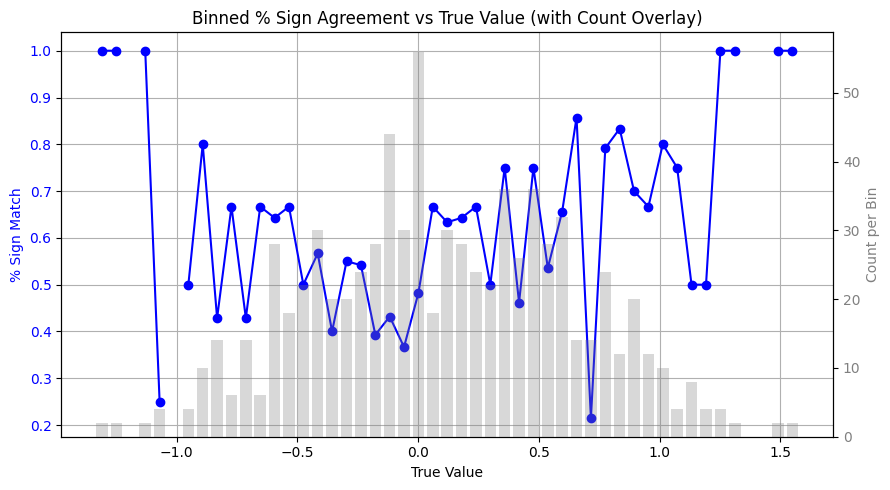

In [22]:
df = bigboss
bins = np.linspace(df['true'].min(), df['true'].max(), num=50)
df['bin'] = pd.cut(df['true'], bins)

# Calculate per-bin % sign match and count
bin_stats = df.groupby('bin').apply(
    lambda x: pd.Series({
        'sign_match_pct': np.mean(np.sign(x['true']) == np.sign(x['pred'])),
        'count': len(x)
    })
).reset_index()

# X-axis: bin midpoints
bin_centers = [interval.mid for interval in bin_stats['bin']]

# Setup plot with twin axes
fig, ax1 = plt.subplots(figsize=(9, 5))
ax2 = ax1.twinx()

# Plot % sign match (line)
ax1.plot(bin_centers, bin_stats['sign_match_pct'], color='blue', marker='o', label='% Sign Match')
ax1.set_ylabel('% Sign Match', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot point counts (bars)
ax2.bar(bin_centers, bin_stats['count'], width=(bins[1] - bins[0]) * 0.8, color='gray', alpha=0.3, label='Count')
ax2.set_ylabel('Count per Bin', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Common axis formatting
ax1.set_xlabel('True Value')
ax1.set_title('Binned % Sign Agreement vs True Value (with Count Overlay)')
ax1.grid(True)
fig.tight_layout()
plt.show()

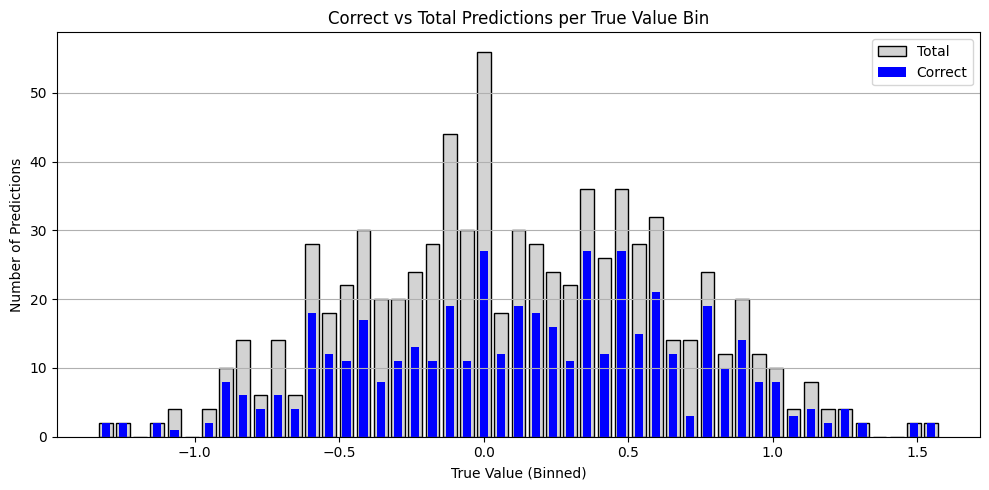

In [25]:
df = bigboss
bins = np.linspace(df['true'].min(), df['true'].max(), num=50)
df['bin'] = pd.cut(df['true'], bins)

# Calculate total and correct counts per bin
bin_stats = df.groupby('bin').apply(
    lambda x: pd.Series({
        'total': len(x),
        'correct': np.sum(np.sign(x['true']) == np.sign(x['pred']))
    })
).reset_index()

# X-axis bin centers
bin_centers = np.array([interval.mid for interval in bin_stats['bin']])
bar_width = (bins[1] - bins[0]) * 0.8

# Plot
plt.figure(figsize=(10, 5))

# Plot total counts (background)
plt.bar(bin_centers, bin_stats['total'], width=bar_width, color='lightgray', label='Total', edgecolor='k')

# Plot correct counts (foreground)
plt.bar(bin_centers, bin_stats['correct'], width=bar_width * 0.6, color='blue', label='Correct')

# Labels
plt.xlabel('True Value (Binned)')
plt.ylabel('Number of Predictions')
plt.title('Correct vs Total Predictions per True Value Bin')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [16]:
bigboss

,4,mouse_chr,1,2,mouse_peak,mouse_true,mouse_pred,mac_chr,1,2,mac_peak,mac_true,mac_pred,true,pred
0,peak55529,chr2,3229009,3229509,peak11427,2.874913,2.256092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,peak55529,chr2,3229009,3229509,peak11427,2.874913,2.222060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,peak62146,chr2,3799725,3800225,peak11438,1.777192,0.654495,chr8,52281336.0,52281836.0,peak33144,2.373198,2.128068,-0.596006,-1.473573
3,peak62146,chr2,3799725,3800225,peak11438,1.777192,0.647902,chr8,52281336.0,52281836.0,peak33144,2.373198,2.139116,-0.596006,-1.491214
4,peak33144,chr1,4571486,4571986,peak23,2.555183,1.904851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,peak12739,chr1,195018073,195018573,peak1969,2.492961,1.354799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,peak77700,chr1,195033938,195034438,peak1970,2.576299,1.209667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,peak77700,chr1,195033938,195034438,peak1970,2.576299,0.806165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,peak67562,chr1,195040379,195040879,peak1972,2.505015,2.098550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
